In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train_raw= pd.read_csv('/Users/cuicuisong/Desktop/data/X_train_aggregated.csv',  index_col=0)
X_test_raw= pd.read_csv('/Users/cuicuisong/Desktop/data/X_test_aggregated.csv',  index_col=0)
y_train_raw= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_agg.csv')
y_test_raw= pd.read_csv('/Users/cuicuisong/Desktop/data//y_test_agg.csv')

In [3]:
X_train_raw.shape

(4328, 54)

In [4]:
# append train and test
X = X_train_raw.append(X_test_raw, ignore_index=True)
y = y_train_raw.append(y_test_raw, ignore_index=True)

In [5]:
X.fillna(0,inplace=True)

In [6]:
X.shape

(5410, 54)

In [37]:
y.shape

(5410, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 99)


In [8]:
X_train.shape

(2705, 54)

In [9]:
y_train.shape

(2705, 1)

In [10]:
X_test.shape

(2705, 54)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [12]:
# use MinMaxScaler and LogisticRegression to build a classification pipeline.
steps = [# ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
# Calculate the training and testing accuracy scores.
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred)))

# a little lower than 80/20 ratio: 0.939, 0.938

Training Accuracy Score: 0.926
Testinging Accuracy Score: 0.930


In [16]:
# Calculate the precision, recall, and f1 scores. You can use classification report.

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# a little lower than 80/20 ratio

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2442
           1       0.67      0.46      0.54       263

    accuracy                           0.93      2705
   macro avg       0.81      0.72      0.75      2705
weighted avg       0.92      0.93      0.92      2705

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2462
           1       0.66      0.48      0.55       243

    accuracy                           0.93      2705
   macro avg       0.80      0.73      0.76      2705
weighted avg       0.92      0.93      0.93      2705



In [17]:
# Get the confusion matrix
print(confusion_matrix(y_train, y_train_pred))
print("-------------")
print(confusion_matrix(y_test, y_test_pred))

[[2384   58]
 [ 143  120]]
-------------
[[2401   61]
 [ 127  116]]


### Feature Importance

Feature: 0, Score: -0.02669
Feature: 1, Score: -0.05665
Feature: 2, Score: 0.01445
Feature: 3, Score: -0.11017
Feature: 4, Score: 0.05524
Feature: 5, Score: -0.02704
Feature: 6, Score: -0.03860
Feature: 7, Score: -0.02802
Feature: 8, Score: -0.06474
Feature: 9, Score: 0.01065
Feature: 10, Score: -0.06389
Feature: 11, Score: -0.01373
Feature: 12, Score: -0.11990
Feature: 13, Score: -0.00184
Feature: 14, Score: -0.11663
Feature: 15, Score: 0.01227
Feature: 16, Score: 0.12011
Feature: 17, Score: -0.02852
Feature: 18, Score: 0.34203
Feature: 19, Score: -0.22861
Feature: 20, Score: -0.08473
Feature: 21, Score: 2.56137
Feature: 22, Score: 1.53903
Feature: 23, Score: 0.07502
Feature: 24, Score: -0.03451
Feature: 25, Score: 0.11648
Feature: 26, Score: -0.03344
Feature: 27, Score: -0.00828
Feature: 28, Score: -0.08341
Feature: 29, Score: 0.08564
Feature: 30, Score: -0.08871
Feature: 31, Score: 0.08633
Feature: 32, Score: -0.00857
Feature: 33, Score: 0.03609
Feature: 34, Score: -0.00841
Feature:

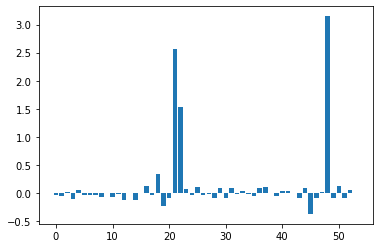

In [18]:
# Note: https://pythonguides.com/scikit-learn-logistic-regression/

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

X_train, y_train = make_classification(n_samples=5410, n_features=54,  random_state=1)

model_feature = LogisticRegression()

model_feature = model_feature.fit(X_train, y_train)
importance = model_feature.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

# Feature: 21, Score: 2.561376, same as 80/20 ratio
# Feature: 22, Score: 1.53903, same as 80/20 ratio


#### II. Prediction with balanced class weights: may not need this part, because our data is balanced?

##### 2.1 Set class_weight in Logistic Regression and retrain the model.

In [19]:
steps = [#('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model.fit(X_train, y_train)

In [20]:
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

In [21]:
# Re-calcualte all the above metrics and confusion matrix.
# training/testing Accuracy scores
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred_balanced)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred_balanced)))

# notes: different from non-balanced model, test accuray is much lower.

Training Accuracy Score: 0.966
Testinging Accuracy Score: 0.136


In [22]:
print(classification_report(y_train, y_train_pred_balanced))
print(classification_report(y_test, y_test_pred_balanced))

# notes:  different from non-balanced model

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2711
           1       0.96      0.97      0.97      2699

    accuracy                           0.97      5410
   macro avg       0.97      0.97      0.97      5410
weighted avg       0.97      0.97      0.97      5410

              precision    recall  f1-score   support

           0       0.81      0.07      0.12      2462
           1       0.08      0.84      0.15       243

    accuracy                           0.14      2705
   macro avg       0.45      0.46      0.14      2705
weighted avg       0.75      0.14      0.13      2705



In [23]:
print(confusion_matrix(y_train, y_train_pred_balanced))
print("-------------")
print(confusion_matrix(y_test, y_test_pred_balanced))

# different from non-balanced model

[[2599  112]
 [  70 2629]]
-------------
[[ 164 2298]
 [  38  205]]


### III. Use the predict_proba function of the model to make predictions for the training and testing sets

In [29]:
steps = [#('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model.fit(X_train, y_train)
# y_train_pred_balanced = model_balanced.predict(X_train)
# y_test_pred_balanced = model_balanced.predict(X_test)

In [30]:
y_train_proba = model_balanced.predict_proba(X_train)

# Linda: (train_raw), so we should use X_train+y_train ????

In [31]:
y_train_proba.shape
# why is 5410 ???????

(5410, 2)

In [27]:
y_test_proba = model_balanced.predict_proba(X_test)

In [28]:
y_test_proba.shape

(2705, 2)

In [32]:
y_test_proba

# The output from predict is the values of 0 or 1 while the output of predict_prob has two columns: the first column is the probability of predicting 0, the second column is the probability of predicting 1.
# In this case, we should care about the second column, probability of 1.

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.03763777, 0.96236223],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [33]:
# What is the range of the values in y_train_proba and y_test_proba? What do the values mean?
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 3.0065376273151777e-10 , 0.99999459007037 )
The range of y_train_proba is: ( 0.0 , 1.0 )


#### 3.2 Threshold

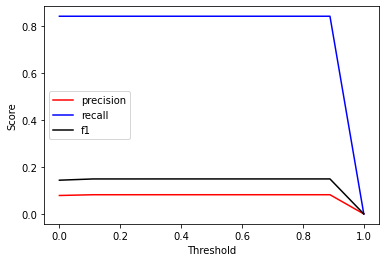

In [34]:
# Plot metrics scores v.s. threshold - Linda

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_pred_new = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_pred_new, average=ave))
    recalls.append(recall_score(y_test, y_test_pred_new, average=ave))
    f1s.append(f1_score(y_test, y_test_pred_new, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")


##### ????????

#### 3.3 ROC AUC

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:, 1])

# bigger than 80/20 ratio

0.9910789807118747

In [37]:
roc_auc_score(y_test, y_test_proba[:, 1])
# much smaller  than 80/20 ratio, a little bigger than 70/30

0.4545870900235013

#### Plot the ROC curve of test scores, use the roc_curve module in sklearn to obtain relevant data.

In [38]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1])

Text(0, 0.5, 'true positive rate')

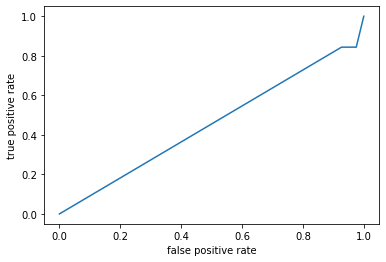

In [40]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# The x axes is the false positive rate (recall or sensitivity) and the y axes is the true positive rate.

#### 3.4 Log Loss

In [41]:
from sklearn.metrics import log_loss
log_loss(y_train, y_train_proba)

0.10541583348626941

In [42]:
log_loss(y_test, y_test_proba)

29.72867540078489